<a href="https://colab.research.google.com/github/duongs1mple/CrackDetection/blob/main/CrackDetectionConvnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/ThongTinSo/

/content/drive/MyDrive/ThongTinSo


In [ ]:
#!pip uninstall tensorflow

In [ ]:
#!pip install tensorflow==2.3.0

In [ ]:
#importing os, shutil and glob for copying concrete images from raw folder to the new structure which is 
#required for ImageDataGenerator.flow_from_directory
import os
import shutil
import glob

In [ ]:
ls

crack_dataset@                                                my_model_250/
Crack-Detection-and-Segmentation-Dataset-for-UAV-Inspection/  my_model_250_2/
data_8k/                                                      my_model.h5
my_model_220.h5                                               terminal.ipynb


In [ ]:
###Main directory where concrete images dataset is present##########
mainDir = './crack_dataset/crack_detection_dataset/crack_detection_dataset_2/100_times_100/'

In [ ]:
#storing locations of crack images in crack_images list
crack_images = os.listdir(mainDir+'accept')
print('total number of images of concrete with cracks are : ', len(crack_images))

total number of images of concrete with cracks are :  13448


In [ ]:
#storing locations of uncrack images in uncrack_images list
uncrack_images = os.listdir(mainDir+'nonaccept')
print('total number of images of concrete without cracks are : ', len(uncrack_images))

total number of images of concrete without cracks are :  11652


## Let's visualize the images

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

***************Images of concrete with cracks**********************


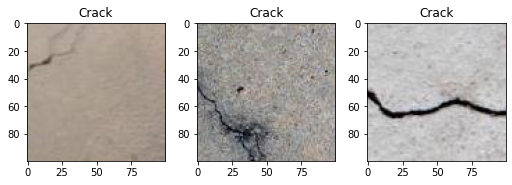

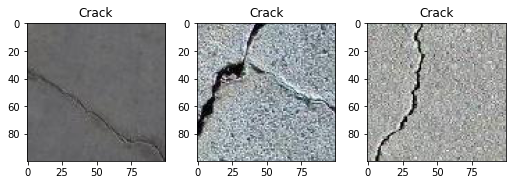

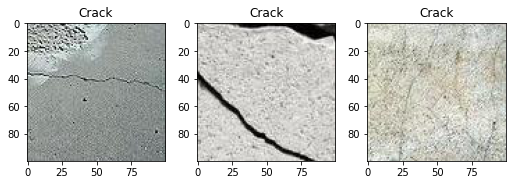

In [ ]:
##Displaying images with crack
random_crack_images_indices = np.random.randint(0, len(crack_images), 9)
random_crack_images = [crack_images[index] for index in random_crack_images_indices]
print('***************Images of concrete with cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'accept/', random_crack_images[imindex])))
        axisarr.set_title('Crack')
        imindex += 1
plt.show()

***************Images of concrete without cracks**********************


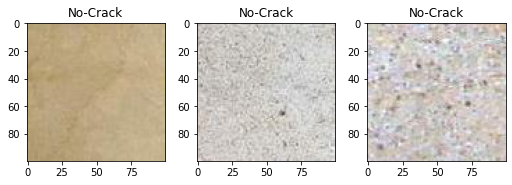

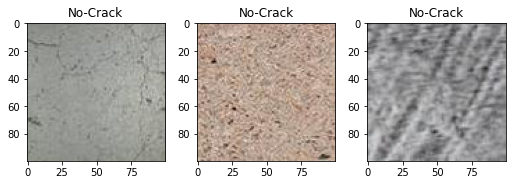

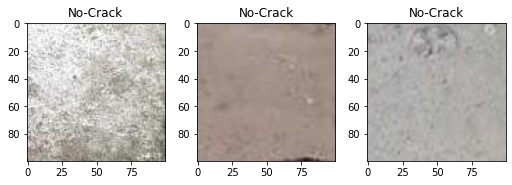

In [ ]:
##Displaying images without crack
random_uncrack_images_indices = np.random.randint(0, len(uncrack_images), 9)
random_uncrack_images = [uncrack_images[index] for index in random_uncrack_images_indices]
print('***************Images of concrete without cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'nonaccept/', random_uncrack_images[imindex])))
        axisarr.set_title('No-Crack')
        imindex += 1
plt.show()

# We will use only 8K images out of total 25K images

# 4K images with crack and 4K images without crack

#### Make folders and move images into them

#### This schema will be used by ImageDataGeneratorClass of Keras

In [ ]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 8K images(4K images with crack and 4K images without crack)
#os.mkdir('data_8k')
#os.mkdir('data_8k/train')
#os.mkdir('data_8k/test')
#os.mkdir('data_8k/validation')

#os.mkdir('data_8k/visualization/')
#os.mkdir('data_8k/visualization/real_images')

#os.mkdir('data_8k/train/crack')
#os.mkdir('data_8k/train/uncrack')
#os.mkdir('data_8k/test/crack')
#os.mkdir('data_8k/test/uncrack')
#os.mkdir('data_8k/validation/crack')
#os.mkdir('data_8k/validation/uncrack') 

In [ ]:
crack_images_path = [os.path.join(mainDir, 'accept/', image) for image in crack_images]
uncrack_images_path = [os.path.join(mainDir, 'nonaccept/', image) for image in uncrack_images]

NameError: ignored

In [ ]:
#lets shuffle these images
import random
random.shuffle(crack_images_path)
random.shuffle(uncrack_images_path)

In [ ]:
#now since the crack and uncrack images list is shuffled, let's choose first 4K images from crack and uncrack images
first_4K_crack_images_path = crack_images_path[0:4000]
first_4K_uncrack_images_path = uncrack_images_path[0:4000]

In [ ]:
print(len(first_4K_crack_images_path), len(first_4K_uncrack_images_path))

In [ ]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_4K = first_4K_crack_images_path[0:2800]  #out of 4K, 2.8K images are for training the model
test_crack_4K = first_4K_crack_images_path[2800:3400]  #out of 4K, 600 images are for testing the model
validation_crack_4K = first_4K_crack_images_path[3400:3995]  #out of 4K, 595 images are for validation of the model
visualization_crack_4K = first_4K_crack_images_path[3995:4000]  #5 are reserved for visualization of the model

train_uncrack_4K = first_4K_uncrack_images_path[0:2800]  #out of 4K, 2.8K images are for training the model
test_uncrack_4K = first_4K_uncrack_images_path[2800:3400]  #out of 4K, 600 images are for testing the model
validation_uncrack_4K = first_4K_uncrack_images_path[3400:3995]  #out of 4K, 595 images are for validation of the model
visualization_uncrack_4K = first_4K_uncrack_images_path[3995:4000]  #5 are reserved for visualization of the model

In [ ]:
#now copy these images into the respective folders

base_dir = 'data_8k/'

#copying train_crack into data_8K/train/crack
for image in train_crack_4K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_8K/test/crack
for image in test_crack_4K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_8K/validation/crack
for image in validation_crack_4K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_8K/visualization
for image in visualization_crack_4K:
    dest = os.path.join(base_dir, 'visualization/')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_8K/train/uncrack
for image in train_uncrack_4K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_8K/test/uncrack
for image in test_uncrack_4K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_8K/validation/uncrack
for image in validation_uncrack_4K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_8K/visualization
for image in visualization_uncrack_4K:
    dest = os.path.join(base_dir, 'visualization/')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 8K images

In [ ]:
%tensorflow_version 2.x

In [ ]:
#import keras and different type of layers for for defining CNN models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(100, 100, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(tf.keras.layers.Dropout(0.25)) #de tranh bi over fit

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(tf.keras.layers.Dropout(0.25))
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(tf.keras.layers.Dropout(0.25))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))

#lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer). #model 1
lenetModel.add(Dense(3)) #model 2
#lenetModel.add(Activation('sigmoid')) model 1
lenetModel.add(Activation('softmax')) #model 2

#lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()]) # model 1
lenetModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()]) #model 2

lenetModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 96, 96, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 44, 44, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 16)       

In [ ]:
#lenetModel.load_weights('lenetModelWeights_8K.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_8K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
#test_datagen_8K = ImageDataGenerator(rescale=1./255)
#validation_datagen_8K = ImageDataGenerator(rescale=1./255)
#visualization_datagen_8K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_8K = train_datagen_8K.flow_from_directory(
        'data_8k/train/crack',  # this is the target directory
        target_size=(100,100),  # all images will be resized to 100*100
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
#test_generator_8K = test_datagen_8K.flow_from_directory(
        #'data_8k/test',
        #target_size=(100, 100),
        #batch_size=batch_size,
        #class_mode='binary')

# this is a similar generator, for validation data
#validation_generator_8K = validation_datagen_8K.flow_from_directory(
        #'data_8k/validation',
        #target_size=(100, 100),
        #batch_size=batch_size,
        #class_mode='binary')

# this is a similar generator, for visualization data
#visualization_generator_8K = visualization_datagen_8K.flow_from_directory(
        #'data_8k/visualization',
        #target_size=(100, 100),
       # batch_size=batch_size,
       # class_mode='binary')

Found 300 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [ ]:
import time
start_time = time.time() 
lenetModel.fit_generator(
        train_generator_8K,
        epochs=100,
        callbacks=[es]
)
finish_time = time.time()
time_taken = finish_time-start_time
lenetModel.save('my_model_250_4')
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 74s 4s/step - loss: 1.1304 - accuracy: 0.3667 - precision_1: 0.4182 - recall_1: 0.0767
Epoch 2/100
10/10 [==============================] - 1s 95ms/step - loss: 1.1031 - accuracy: 0.3033 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 1s 94ms/step - loss: 1.0989 - accuracy: 0.3333 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 1s 96ms/step - loss: 1.0999 - accuracy: 0.3067 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 1s 95ms/step - loss: 1.0983 - accuracy: 0.3633 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 1s 94ms/step - loss: 1.0992 - accuracy: 0.3000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 1s 95ms/step - loss: 1.0992 - accuracy: 0.3400 - precision_1: 

In [ ]:
test_loss_8K, accuracy_8K, precision_8K, recall_8K = lenetModel.evaluate_generator(test_generator_8K)

NameError: ignored

In [ ]:
print(' accuracy_8K : ', accuracy_8K, '\n', 'precision_8K : ', precision_8K, '\n', 'recall_8K : ', recall_8K)

### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 8K IMAGES

In [ ]:
imgarr_8K = visualization_generator_8K[0][0]
imgarr_8K.shape

In [ ]:
import numpy as np

predictions = lenetModel.predict(imgarr_8K)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_8K[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [ ]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 40K images(20K images with crack and 20K images without crack)
os.mkdir('data_40k')
os.mkdir('data_40k/train')
os.mkdir('data_40k/test')
os.mkdir('data_40k/validation')
os.mkdir('data_40k/visualization')

os.mkdir('data_40k/train/crack')
os.mkdir('data_40k/train/uncrack')
os.mkdir('data_40k/test/crack')
os.mkdir('data_40k/test/uncrack')
os.mkdir('data_40k/validation/crack')
os.mkdir('data_40k/validation/uncrack')
os.mkdir('data_40k/visualization/real_images')

In [ ]:
random_images_path = 'raw_images/'
images = os.listdir(random_images_path)

In [ ]:
def highlight_cracks1(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in range(12):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (227, 227))
            im_arr = np.zeros((1, 227, 227, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 0, 0)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

(1200, 1200, 3) (1200, 1200, 3)


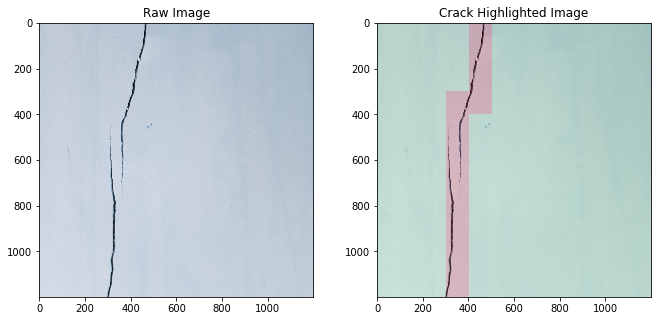

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[0]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image1 = highlight_cracks(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image1.jpg'), crack_highlighted_image1)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image1)
axisarr.set_title('Crack Highlighted Image')
print(crack_highlighted_image1.shape, im.shape)

Text(0.5, 1.0, 'Crack Highlighted Image')

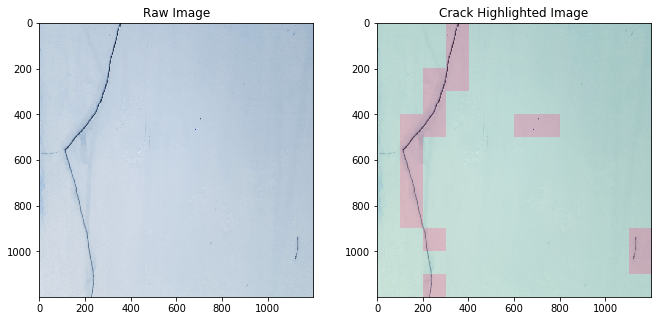

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[1]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image2 = highlight_cracks1(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image2.jpg'), crack_highlighted_image2)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image2)
axisarr.set_title('Crack Highlighted Image')

Text(0.5, 1.0, 'Crack Highlighted Image')

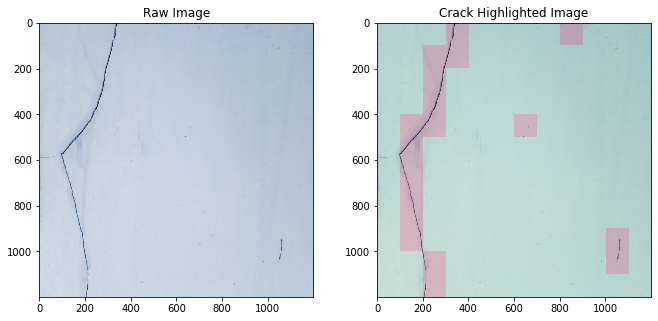

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[2]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image3 = highlight_cracks1(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image3.jpg'), crack_highlighted_image3)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image3)
axisarr.set_title('Crack Highlighted Image')

Text(0.5, 1.0, 'Crack Highlighted Image')

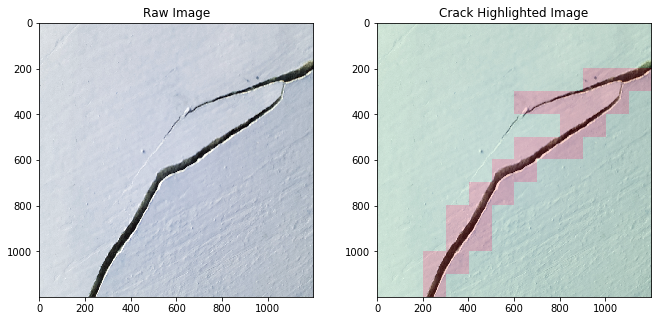

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[3]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image4 = highlight_cracks1(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image4.jpg'), crack_highlighted_image4)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image4)
axisarr.set_title('Crack Highlighted Image')

Text(0.5, 1.0, 'Crack Highlighted Image')

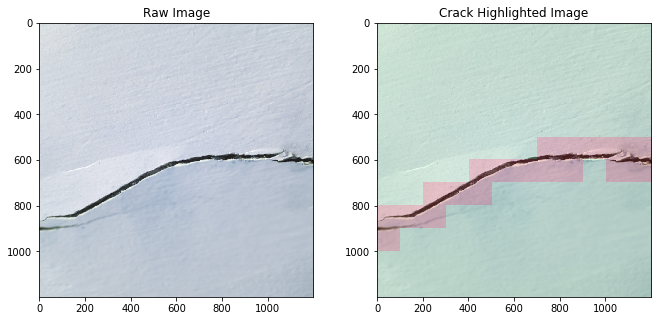

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[4]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image5 = highlight_cracks1(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image5.jpg'), crack_highlighted_image5)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image5)
axisarr.set_title('Crack Highlighted Image')

Text(0.5, 1.0, 'Crack Highlighted Image')

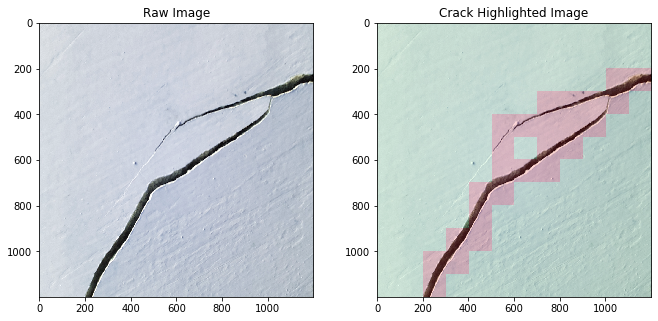

In [ ]:
im = cv2.imread(os.path.join(random_images_path, images[5]))
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image6 = highlight_cracks1(im, lenetModel_40K)
cv2.imwrite(os.path.join('output/', 'image6.jpg'), crack_highlighted_image6)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image6)
axisarr.set_title('Crack Highlighted Image')